<center>
    <h1> Math761: HW 2 <br>
    Basic Simulation Practice </h1>
  </center>
  
  ## Mihir Kotecha
### 09/17/2024


## General Instructions

_This homework requires you two submit two things now and one thing later:_

1) A jupyter notebook (.ipynb file) which will include your code, the results from when you ran the code, and textual interpetations as asked in the questions.

2) A video (10 minute max).  Each question specifies the part you need to explain by video. For example, if part a of question 1 says "**Code Up & Explain in Video**", then after you have finished coding up your work to your satisfaction (or to the point where you have to submit before the deadline!), please record a video where you go over your code and explain what each part of the code does and the role each part of the code plays in helping you to achieve the statistical goal of the question. Note that the whole video you submit for your whole assignment should be 10 minutes or less. If your video goes over 10 minutes, I will only grade or give feedback on the first 10 minutes. This is so that I can give everyone feedback in a timely manner. It may be helpful if you rehearse your video before you record it or use a video editor (Da Vinci is free) to help you keep your video under the time limit while letting you cover all the important information you want to explain.

3) After I give you feedback on the homework, you'll submit your own scoring of your corrected work, where you should also explain why you gave yourself each rubric score.

_This homework also has a metacognitive component that asks you to reflect on your own learning_:
To give you the opportunity and encourage you to reflect on your own work, learn from mistakes, and reward you for improving, for the last two questions of each homework, I will provide you feedback but no grade. Instead, you will be able to take the feedback to improve your work. Then you will self-assess using the rubric provided. This you will simply need to submit before the midterm. There will be a submission link on MyOpenMath for you before then.

<br>

_Grading_:
The two grading rubrics (how I will grade and the rubric you will use to self-assess your improvements) are here https://docs.google.com/document/d/14Fh4Bm0IhxfYFJaHv1eepKdlUKuTo3T-apgLu1HvJUM/edit?usp=sharing. The grade you will see for this homework will be the grade that I provide on my two questions. However, they are only worth 50% of your HW grade. You will submit your self-assessment (before the midterm), which you should also save for your "portfolio". At the end of the term, we will meet for 5-10 minutes to go over your portfolio so that you can tell me how you evaluate your own improvements and how you graded yourself. Based on this we will come up with the other 50% of your overall HW grade.




<br>





### Exercise 1: Performance of $k$ trimmed means

a) Estimate the MSE and variances of the level $k$ trimmed means for 1000 random samples of size 20 generated from a standard Cauchy distribution with center at 0.  Summarize the estimates of MSE and variances in a table for $k = 1, 2, ..., 9.$

**Hint.** As a test case for you to check you're on the right track, if you put in the code `set.seed(1)` before you do your random Cauchy samples, you should get results like this table (first column is MSE, second is Var):

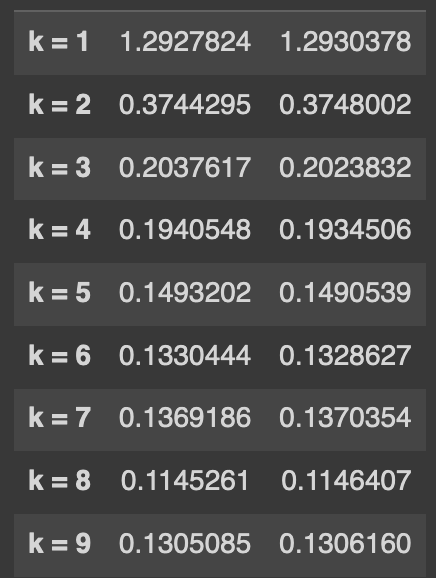

b) **Write Up Only**: Then answer, what does the simulation tell you about how the different k-level trimmed means perform for this setting? As part of your answer, answer what levels of $k$ seem to do best.
    

In [ ]:
# Question 1A

# Initialize a seed for reproducibility
set.seed(100)

# Set the number of iterations and sample size
num_iterations <- 1000
n_samples <- 20

# Generate a matrix of 1000 samples, each of size 20, from a standard Cauchy distribution
random_samples <- matrix(rcauchy(num_iterations * n_samples), ncol = n_samples)

# Define a function to compute the trimmed mean for a given level of trimming
calculate_trimmed_mean <- function(sample_data, trim_level) {
  ordered_data <- sort(sample_data)
  mean(ordered_data[(trim_level + 1):(length(ordered_data) - trim_level)])
}

# Create a table to store MSE and variance results for trimming levels 1 through 9
trim_results <- matrix(NA, nrow = 9, ncol = 3)
colnames(trim_results) <- c("Trim_Level", "MSE", "Variance")

# Loop over trimming levels (1 to 9) and calculate the MSE and variance for each
for (trim_level in 1:9) {
  # Compute the trimmed means for each sample in the matrix
  trimmed_means <- apply(random_samples, 1, calculate_trimmed_mean, trim_level = trim_level)

  # Store the current trimming level
  trim_results[trim_level, "Trim_Level"] <- trim_level

  # Calculate the Mean Squared Error (MSE) using the true center of the Cauchy distribution (0)
  trim_results[trim_level, "MSE"] <- mean((trimmed_means - 0)^2)

  # Calculate the variance of the trimmed means
  trim_results[trim_level, "Variance"] <- var(trimmed_means)
}

# Display the final table of results
trim_results

Trim_Level,MSE,Variance
1,1.0933907,1.0943863
2,0.3880016,0.3883632
3,0.2555047,0.2555711
4,0.1995492,0.1995554
5,0.1714780,0.1715547
6,0.1600670,0.1601207
7,0.1528573,0.1529090
8,0.1499750,0.1500403
9,0.1524049,0.1524900


Question B :

The simulation shows that the MSE decreases as the trim level k increases from 1 to 8, which shows an improved performance with increasing trimming. The lowest MSE is seen at k = 8, which suggests that at this trim level is the best balance between removing outliers and keeping enough data. Also, at k = 9, the MSE also slightly increases, which proves that the excessive trimming is starting to impact the estimate.

### Exercise 2: Studying outside the scope of the CLT

Recall that we simulated the CLT (Central Limit Theorem) phenomenon in class by creating 1000 averages, each average from a random sample of 100 random variables drawn from various distributions (normal, uniform, binomial, negative binomial, and Poisson).

a) **Code Up & Explain in Video**: Now create a similar simulation by modifying what we did in class, but explore the results of drawing only a sample size of 5 points from an exponential distribution with rate .2.  Draw a histogram of 1000 averages, and over it, draw the theoretical curve that the CLT says the average should follow for large samples.

*Hint.* As a test case, if you run `set.seed(1)` before any code for this that draws a random sample, you should get this output for your histogram:
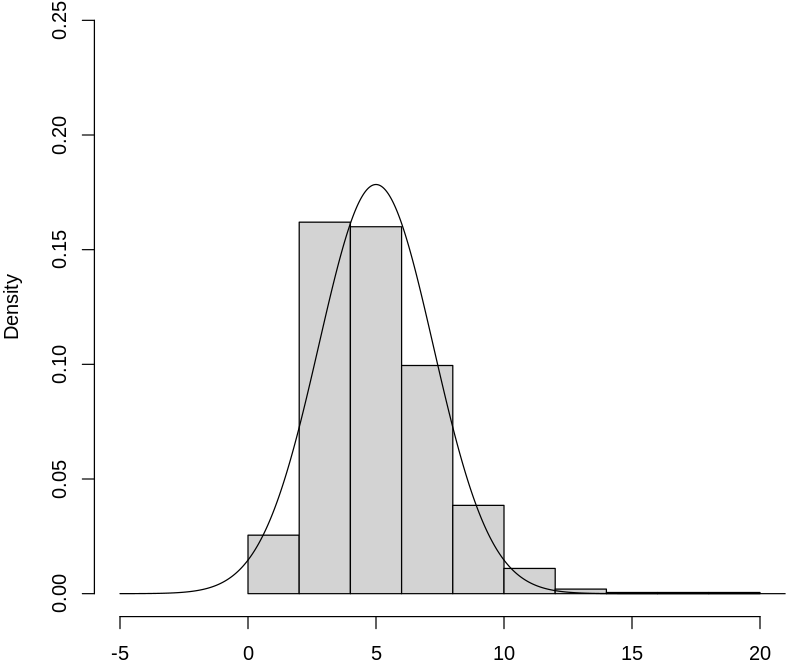


b) **Write Up Only**: Then answer, do the 1000 averages still seem to obey the CLT?

c) **Code Up & Explain in Video**: The CLT also doesn't say anything about the median but we can use simulations to explore its properties. Again modify what we did in class but explore the results of drawing a sample size of 100 points from an exponential distribution with rate .2. This time look at the histogram of 1000 medians rather than 1000 means. Again, plot the CLT theorem curve (as it applies to the mean) over it.

** Hint.** As a test case, if you run `set.seed(1)` before you draw your samples, you should get this as your histogram:
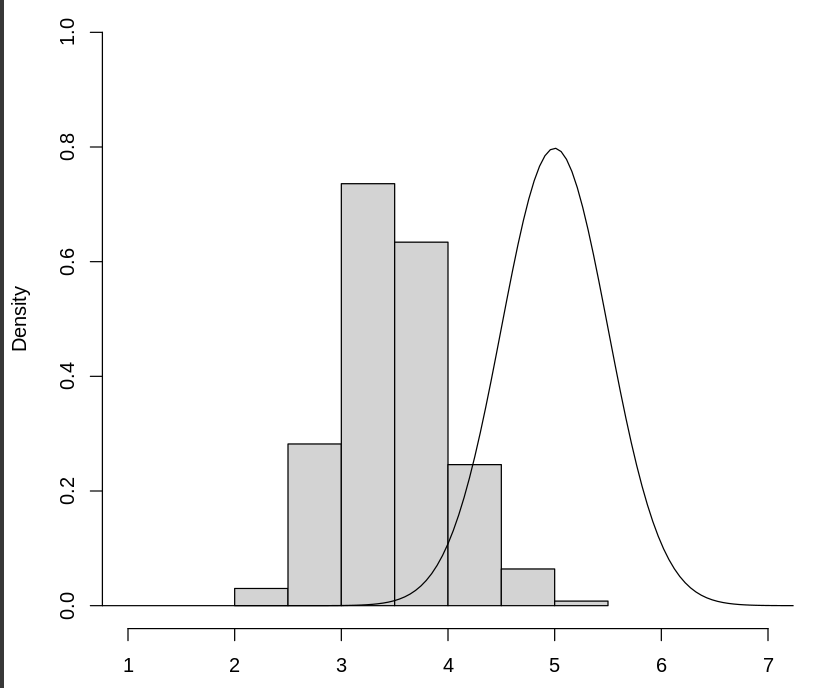


d)  **Write Up Only**: From part (c) , what do your results seem to suggest about the distributional properties for the median with respect to the CLT?


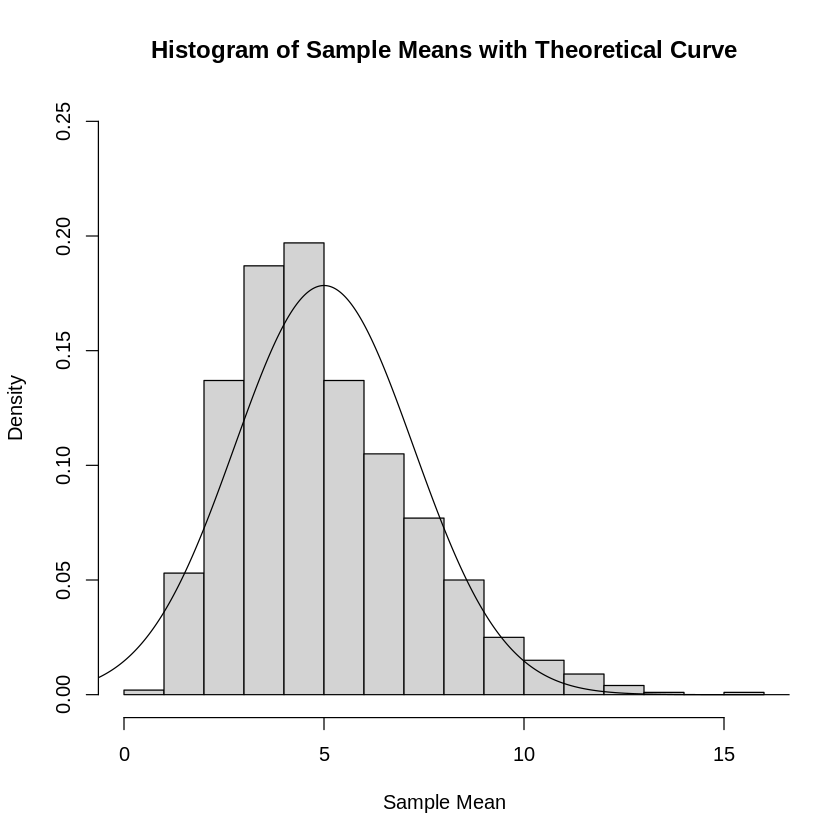

In [ ]:
# Question 2A
# Set parameters for the simulation
n_trials <- 1000  # Number of samples to draw
sample_size <- 5  # Size of each sample
lambda <- 0.2     # Rate parameter for the exponential distribution

# Generate 1000 sample means from an exponential distribution with a rate of 0.2
sample_means <- replicate(n_trials, mean(rexp(sample_size, rate = lambda)))

# Calculate theoretical mean and standard deviation for the overlay
exp_mean <- 1 / lambda  # Mean of the exponential distribution
exp_sd <- sqrt((1 / (lambda^2)) / sample_size)  # Standard deviation of sample mean

# Plot the histogram of the sample means with density curve
hist(sample_means, probability = TRUE, ylim = c(0, 0.25),
     main = "Histogram of Sample Means with Theoretical Curve",
     xlab = "Sample Mean")

# Overlay the theoretical normal distribution curve
x_values <- seq(from = -5, to = 20, length.out = 1000)
lines(x_values, dnorm(x_values, mean = exp_mean, sd = exp_sd))

Question 2B

The histogram of the 1000 sample averages from the distribution shows a right-skew. The general trend toward the bell shape of a normal distribution, there are some deviations from the theoretical curve, which indicates that the sample averages does not fully adhere to the CLT here. This proves that with such a small sample size of 5, the CLT's effect is not fully demonstrated. And increasing the sample size would result in a distribution that aligns with a normal distribution.

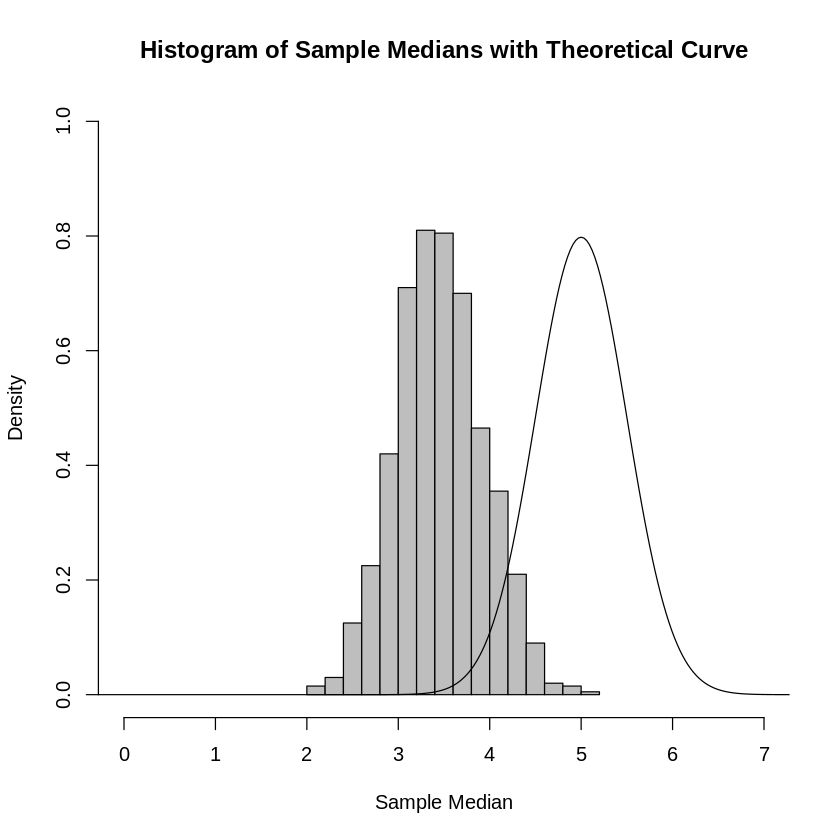

In [8]:
# Question 2C
# Set seed for reproducibility
set.seed(13)

# Define parameters for the simulation
num_samples <- 1000   # Number of samples to generate
new_sample_size <- 100  # New sample size for each draw
exp_rate <- 0.2        # Rate parameter for the exponential distribution

# Generate 1000 medians from samples of size 100 from an exponential distribution with rate 0.2
sample_medians <- replicate(num_samples, median(rexp(new_sample_size, rate = exp_rate)))

# Theoretical mean and standard deviation for the normal distribution (using the mean for overlay)
theoretical_mean <- 1 / exp_rate
theoretical_sd <- sqrt((1 / (exp_rate^2)) / new_sample_size)

# Plot histogram of the sample medians and overlay the theoretical normal distribution curve for the mean
hist(sample_medians, probability = TRUE, xlim = c(0, 7), ylim = c(0, 1),
     main = "Histogram of Sample Medians with Theoretical Curve",
     xlab = "Sample Median", ylab = "Density", col = "gray")

# Overlay the theoretical normal distribution curve (based on the mean)
x_values <- seq(from = -5, to = 25, length.out = 1000)
lines(x_values, dnorm(x_values, mean = theoretical_mean, sd = theoretical_sd))

Question 2D

The results indicate that, while there is alignment between the histogram of medians and the normal curve in the central region, there are deviations. This suggests that even with a large sample size, the distribution of the medians do not fully conform to the CLT in the same way that the mean does.

### Exercise 3

We saw a problem where 5 students sat in a room that was scaled to the unit square. Now consider a situation where 10 students are sitting in a rectangular room, but their positions can only take on discrete values because they sit in chairs which are arranged in rows and columns. The seats are in rows 1, 2, ..., 6 and columns 1, 2, ..., 5.  The students are sitting in the seats located at the following pairs of (row, column):

(1, 3); (1, 4); (1; 5);

(2, 3);

(4, 2); (4, 4); (4, 5);

(5, 1); (5, 2);

(6, 3)

#### a) **Code Up & Explain in Video**: Create a simulation with 1000 runs to conduct a one-sided hypothesis test about how students are sitting around the classroom. For simplicity, don't worry about the fact that two students cannot sit in the same spot. Your simulation should have two outputs: a histogram of your simulated distance values with a vertical line through it that represents the statistic for the actual data; and the approximate p-value that we would see data as extreme as this data (one sided test) if the students really were sitting randomly, independently discretely uniformly around the classroom. In your explanation of your code, make sure you justify which direction you test in for your video.

**Hint.** To help you make sure your code is right, as a test case: If you use `set.seed(1)` at the beginning of your code before you do any random draws, you should get this output for your histogram.
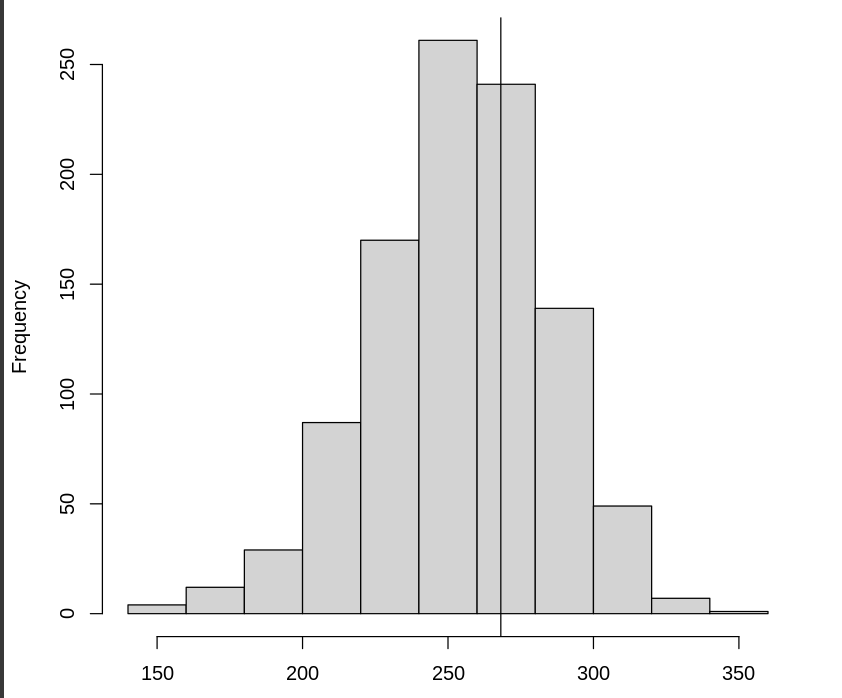

#### b) **Write Up Only**: Then answer: what is your conclusion about how students sat in class? Use hypothesis testing at the $\alpha=.05$ level.



Approximate p-value: 0.331 


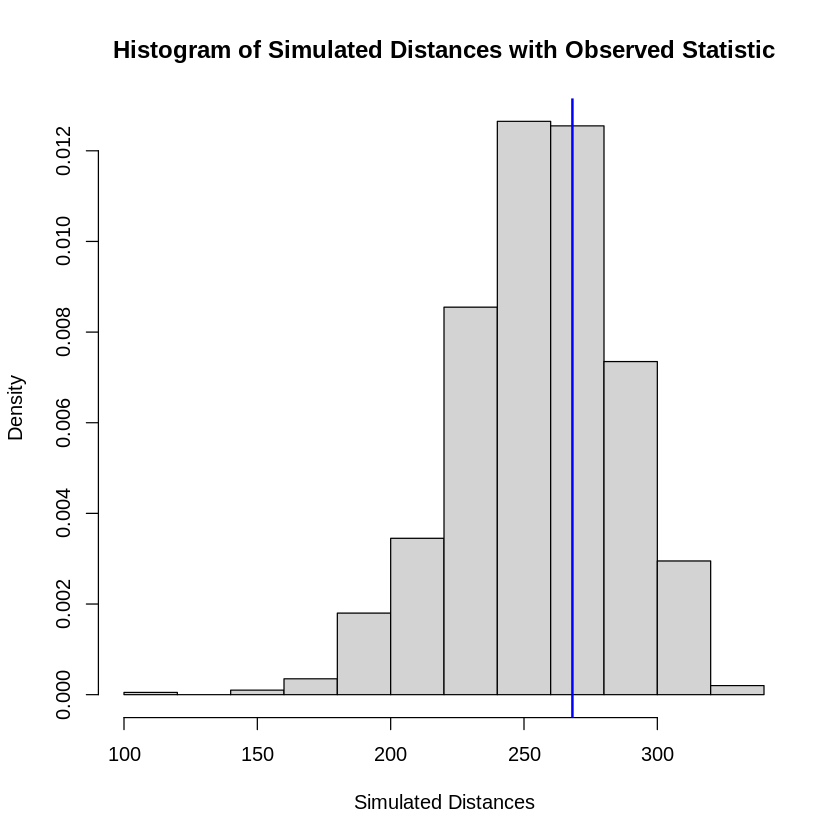

In [1]:
# Question 3A
# Set the seed for reproducibility
# set.seed(1)

# Given student seating coordinates, assigning rows to x_coords and columns to y_coords
x_coords <- c(1, 1, 1, 2, 4, 4, 4, 5, 5, 6)
y_coords <- c(3, 4, 5, 3, 2, 4, 5, 1, 2, 3)

# Function to calculate the total pairwise distances using the Euclidean distance formula
calculate_total_distance <- function(x_vec, y_vec) {
    n <- length(x_vec)
    total_distance <- 0
    for (i in 1:n) {
        for (j in 1:n) {
            # Calculate the distance between each pair of points
            distance_between_points <- sqrt((x_vec[i] - x_vec[j])^2 + (y_vec[i] - y_vec[j])^2)
            total_distance <- total_distance + distance_between_points
        }
    }
    return(total_distance)
}

# Calculate the total distance for the given seating positions and store in observed_statistic
observed_statistic <- calculate_total_distance(x_coords, y_coords)

# Simulation parameters
num_students <- 10
num_simulations <- 1000
simulated_distances <- rep(NA, num_simulations)

# Simulate random seating and calculate pairwise distances
for (i in 1:num_simulations) {
    random_x <- sample(1:6, num_students, replace = TRUE)
    random_y <- sample(1:5, num_students, replace = TRUE)
    simulated_distances[i] <- calculate_total_distance(random_x, random_y)
}

# Calculate the p-value for a one-sided test
extreme_cases <- rep(NA, num_simulations)
for (i in 1:num_simulations) {
    random_x <- sample(1:6, num_students, replace = TRUE)
    random_y <- sample(1:5, num_students, replace = TRUE)
    simulated_statistic <- calculate_total_distance(random_x, random_y)
    if (observed_statistic > mean(simulated_distances)) {
        extreme_cases[i] <- (simulated_statistic > observed_statistic)
    } else {
        extreme_cases[i] <- (simulated_statistic < observed_statistic)
    }
}
p_value <- mean(extreme_cases)  # Calculate the approximate p-value
cat("Approximate p-value:", p_value, "\n")

# Plot the histogram of simulated distances
hist(simulated_distances, probability = TRUE,
     xlab = "Simulated Distances",
     main = "Histogram of Simulated Distances with Observed Statistic")

# Add a vertical line representing the observed statistic
abline(v = observed_statistic, col = "blue", lwd = 2)

Question 3B

$H_0:$ Students are sitting randomly

$H_a:$ Students are not sitting randomly.

In conducting the hypothesis test, using the $\alpha$  = 0.05, comparing it to the P-value of 0.331, we fail to reject the null hypothesis that the students are sitting randomly.

### Exercise 4: Performance of the Gini Index

Let $X$ be a non-negative random variance with $\mu=\mathbb{E}X <\infty$. For a random sample $x_1, \ldots, x_n$ from the distribution of $X$, the Gini ratio is defined by

$$
G = \frac{1}{2n^2\mu}\sum_{j=1}^{n}\sum_{i=1}^{n}|x_i-x_j|.
$$

The Gini ratio is a measure of income equality (used in Economics).

a) **Code Up & Explain in Video**: If the mean is unknown, let $\hat{G}$ be the statistic $G$ with $\mu$ replaced by $\bar{x}$. Estimate using 1000 samples (each sample size 100) the mean and standard error of $\hat{G}$ if $X$ is Uniform(0, 1).

b) **Code Up & Explain in Video**: Also estimate the mean and standard error using 1000 samples if $X$ is Bernoulli(0.1).

** Hint.** To check that your code is on the right track, as a test case, if you run `set.seed(1)` before you run your Bernoulli samples, the mean should be `0.331318360208928` and standard error should be `0.0235724481450571`.

c) **Write Up Only**: Then in a sentence or two, analyze what the means and standard errors tell you about the Gini index for these two distributions.

In [5]:
# Question 4A
# Set seed for reproducibility
set.seed(1)

# Parameters for the simulation
num_samples <- 1000  # Number of samples to simulate
sample_size <- 100   # Sample size for each simulation

# Function to calculate the Gini ratio for a given sample
compute_gini <- function(sample) {
  n <- length(sample)  # Size of the sample
  sample_mean <- mean(sample)  # Mean of the sample

  # Compute the sum of absolute differences
  sum_diff <- sum(abs(outer(sample, sample, "-")))

  # Calculate the Gini ratio using the provided formula
  gini_value <- sum_diff / (2 * n^2 * sample_mean)
  return(gini_value)
}

# Simulate 1000 Gini ratios for samples drawn from a Uniform(0, 1) distribution
gini_estimates <- replicate(num_samples, compute_gini(runif(sample_size, 0, 1)))

# Estimate the mean and standard error of the Gini ratios
mean_gini <- mean(gini_estimates)
standard_error_gini <- sd(gini_estimates) / sqrt(num_samples)

# Output the results
cat("Estimated Mean of Gini ratio:", mean_gini, "\n")
cat("Estimated Standard Error of Gini ratio:", standard_error_gini, "\n")

Estimated Mean of Gini ratio: 0.3322893 
Estimated Standard Error of Gini ratio: 0.0007626875 


In [7]:
# Question 4B
# Set seed for reproducibility
set.seed(1)

# Parameters for the simulation: number of samples, sample size, and Bernoulli probability
num_samples <- 1000  # Number of simulations
sample_size <- 100   # Sample size for each simulation
prob_success <- 0.1  # Probability of success for Bernoulli distribution

# Function to generate samples from a Bernoulli distribution
sample_bernoulli <- function(size, probability) {
  return(rbinom(size, 1, probability))
}

# Simulate 1000 Gini ratios for samples drawn from a Bernoulli(0.1) distribution
gini_values_bernoulli <- replicate(num_samples, compute_gini(sample_bernoulli(sample_size, prob_success)))

# Calculate the mean of the Gini coefficients from the Bernoulli simulation
average_gini_bernoulli <- mean(gini_values_bernoulli)

# Calculate the standard error of the Gini coefficients
std_error_gini_bernoulli <- sd(gini_values_bernoulli) / sqrt(num_samples)

# Display the results
cat("Estimated Mean of Gini coefficients (Bernoulli):", average_gini_bernoulli, "\n")
cat("Estimated Standard Error of Gini coefficients (Bernoulli):", std_error_gini_bernoulli, "\n")


Estimated Mean of Gini coefficients (Bernoulli): 0.89973 
Estimated Standard Error of Gini coefficients (Bernoulli): 0.0009471664 


Question 4C

The results indicate that the Gini index for the Bernoulli distribution with a mean = 0.8997 is significantly higher than that for the Uniform distribution, with a mean, which suggests that there is a higher inequality in the Bernoulli distribution. ALso, the standard error for both distributions is small, which indicates that the estimates of the Gini index are accurate.